In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# 1. Data Overview

## 1.1 Cab_Data

In [23]:
# Import data
cab_df = pd.read_csv("DataSets/Cab_Data.csv")
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [24]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


## 1.2 Customer_ID

In [26]:
# Import data
customer_df = pd.read_csv("DataSets/Customer_ID.csv")
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [27]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## 1.3 Transaction_ID

In [28]:
# Import data
trans_df = pd.read_csv("DataSets/Transaction_ID.csv")
trans_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [29]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


## 1.4 City

In [61]:
# Import data
city_df = pd.read_csv("DataSets/city.csv")
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [62]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


# 2. Data Preprocessing

In [25]:
# Transform "Date of Travel" to datetime
start_date = pd.Timestamp('1899-12-29')
cab_df["Date of Travel"] = cab_df["Date of Travel"].apply(lambda x: pd.to_datetime(start_date+pd.DateOffset(x), 
                                                                                   format='%m/%d/%y'))
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [33]:
# Merge the dataframes
df = pd.merge(cab_df, trans_df, on = "Transaction ID")
df = pd.merge(df, customer_df, on = "Customer ID")
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [34]:
# Calculate profit and profit/km
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]
df["Profit Per KM"] = df["Profit"] / df["KM Travelled"]

In [64]:
# Attribute 'Population' and "Users" should be integers
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df[["Population", "Users"]] = city_df[["Population", "Users"]].astype(float)
# Add features to city dataframe
city_df["Mean of KM Travelled"] = city_df["City"].apply(lambda x: np.mean(df[df["City"] == x]["KM Travelled"]))
city_df["Sum of KM Travelled"] = city_df["City"].apply(lambda x: np.sum(df[df["City"] == x]["KM Travelled"]))
city_df["Mean of Price Charged"] = city_df["City"].apply(lambda x: np.mean(df[df["City"] == x]["Price Charged"]))
city_df["Mean of Cost of Trip"] = city_df["City"].apply(lambda x: np.mean(df[df["City"] == x]["Cost of Trip"]))
city_df["Mean of Profit"] = city_df["City"].apply(lambda x: np.mean(df[df["City"] == x]["Profit"]))
city_df["Sum of Profit"] = city_df["City"].apply(lambda x: np.sum(df[df["City"] == x]["Profit"]))
city_df["Profit Per KM"] = city_df["Sum of Profit"] / city_df["Sum of KM Travelled"]
city_df["Mean of Age"] = city_df["City"].apply(lambda x: np.mean(df[df["City"] == x]["Age"]))
city_df["Mean of Income"] = city_df["City"].apply(lambda x: np.mean(df[df["City"] == x]["Income (USD/Month)"]))
city_df

,City,Population,Users,Mean of KM Travelled,Sum of KM Travelled,Mean of Price Charged,Mean of Cost of Trip,Mean of Profit,Sum of Profit,Profit Per KM,Mean of Age,Mean of Income
0,NEW YORK NY,8405837.0,302149.0,22.513988,2248809.74,570.196342,290.248851,279.947491,2.796256e+07,12.434380,35.104480,15184.765801
1,CHICAGO IL,1955130.0,164468.0,22.634956,1281704.39,350.398561,290.578457,59.820104,3.387313e+06,2.642820,35.689978,15101.718269
2,LOS ANGELES CA,1595037.0,144132.0,22.666410,1088735.65,370.487465,278.640013,91.847452,4.411709e+06,4.052139,35.659151,15064.550455
3,MIAMI FL,1339155.0,17675.0,22.531480,145418.17,399.773040,282.279820,117.493220,7.583012e+05,5.214625,35.897583,14984.887202
4,SILICON VALLEY,1177609.0,27247.0,22.738933,193712.97,432.457114,277.896100,154.561013,1.316705e+06,6.797197,35.093203,15248.547717
5,ORANGE COUNTY,1030185.0,12994.0,22.307054,88826.69,390.475442,275.708522,114.766920,4.570019e+05,5.144871,35.338774,15188.944500
6,SAN DIEGO CA,959307.0,69995.0,22.476752,460503.69,348.320021,270.852066,77.467955,1.587163e+06,3.446581,35.072140,15049.874854
7,PHOENIX AZ,943999.0,6133.0,22.202074,45825.08,366.609806,273.130697,93.479109,1.929409e+05,4.210377,35.357074,15012.038275
8,DALLAS TX,942908.0,22157.0,22.485685,157782.05,447.830969,286.974012,160.856957,1.128733e+06,7.153750,35.681345,14846.508194
9,ATLANTA GA,814885.0,24701.0,22.316231,168643.76,394.368363,282.891205,111.477158,8.424329e+05,4.995340,35.310308,14933.150986


Since there is no cab data in San Francisico, we delete row 14.

In [65]:
# Delete row 14
city_df.drop(14, axis = 0, inplace=True)
city_df

,City,Population,Users,Mean of KM Travelled,Sum of KM Travelled,Mean of Price Charged,Mean of Cost of Trip,Mean of Profit,Sum of Profit,Profit Per KM,Mean of Age,Mean of Income
0,NEW YORK NY,8405837.0,302149.0,22.513988,2248809.74,570.196342,290.248851,279.947491,2.796256e+07,12.434380,35.104480,15184.765801
1,CHICAGO IL,1955130.0,164468.0,22.634956,1281704.39,350.398561,290.578457,59.820104,3.387313e+06,2.642820,35.689978,15101.718269
2,LOS ANGELES CA,1595037.0,144132.0,22.666410,1088735.65,370.487465,278.640013,91.847452,4.411709e+06,4.052139,35.659151,15064.550455
3,MIAMI FL,1339155.0,17675.0,22.531480,145418.17,399.773040,282.279820,117.493220,7.583012e+05,5.214625,35.897583,14984.887202
4,SILICON VALLEY,1177609.0,27247.0,22.738933,193712.97,432.457114,277.896100,154.561013,1.316705e+06,6.797197,35.093203,15248.547717
5,ORANGE COUNTY,1030185.0,12994.0,22.307054,88826.69,390.475442,275.708522,114.766920,4.570019e+05,5.144871,35.338774,15188.944500
6,SAN DIEGO CA,959307.0,69995.0,22.476752,460503.69,348.320021,270.852066,77.467955,1.587163e+06,3.446581,35.072140,15049.874854
7,PHOENIX AZ,943999.0,6133.0,22.202074,45825.08,366.609806,273.130697,93.479109,1.929409e+05,4.210377,35.357074,15012.038275
8,DALLAS TX,942908.0,22157.0,22.485685,157782.05,447.830969,286.974012,160.856957,1.128733e+06,7.153750,35.681345,14846.508194
9,ATLANTA GA,814885.0,24701.0,22.316231,168643.76,394.368363,282.891205,111.477158,8.424329e+05,4.995340,35.310308,14933.150986


In [58]:
# Construct company dataframe
company_df = pd.DataFrame({"Company": ["Pink Cab", "Yellow Cab"]})
company_df["Mean of KM Travelled"] = company_df["Company"].apply(lambda x: np.mean(df[df["Company"] == x]["KM Travelled"]))
company_df["Sum of KM Travelled"] = company_df["Company"].apply(lambda x: np.sum(df[df["Company"] == x]["KM Travelled"]))
company_df["Mean of Price Charged"] = company_df["Company"].apply(lambda x: np.mean(df[df["Company"] == x]["Price Charged"]))
company_df["Mean of Cost of Trip"] = company_df["Company"].apply(lambda x: np.mean(df[df["Company"] == x]["Cost of Trip"]))
company_df["Mean of Profit"] = company_df["Company"].apply(lambda x: np.mean(df[df["Company"] == x]["Profit"]))
company_df["Sum of Profit"] = company_df["Company"].apply(lambda x: np.sum(df[df["Company"] == x]["Profit"]))
company_df["Profit Per KM"] = company_df["Sum of Profit"] / company_df["Sum of KM Travelled"]
company_df["Mean of Age"] = company_df["Company"].apply(lambda x: np.mean(df[df["Company"] == x]["Age"]))
company_df["Mean of Income"] = company_df["Company"].apply(lambda x: np.mean(df[df["Company"] == x]["Income (USD/Month)"]))
company_df

,Company,Mean of KM Travelled,Sum of KM Travelled,Mean of Price Charged,Mean of Cost of Trip,Mean of Profit,Sum of Profit,Profit Per KM,Mean of Age,Mean of Income
0,Pink Cab,22.559917,1911073.11,310.800856,248.148682,62.652174,5.307328e+06,2.777146,35.322414,15059.047137
1,Yellow Cab,22.569517,6199417.47,458.181990,297.922004,160.259986,4.402037e+07,7.100727,35.341112,15045.669817


# 3. Investigate the Data

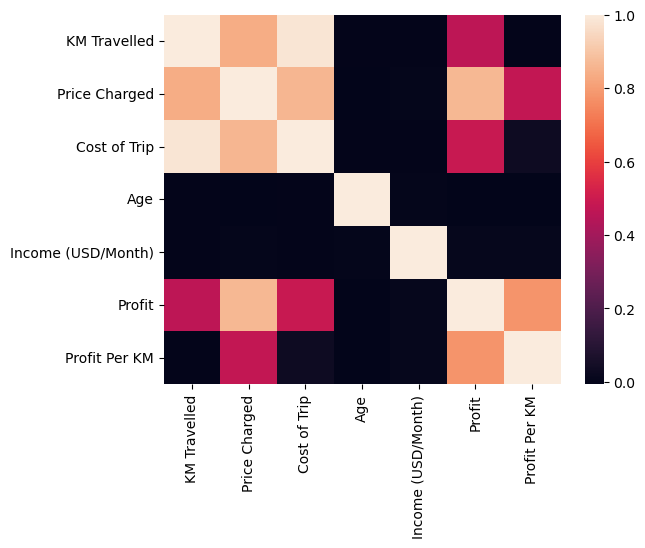

In [49]:
sns.heatmap(df.drop(["Transaction ID", "Customer ID", "Payment_Mode", "Gender"], axis = 1).corr());

We can see that "KM Travelled" and "Cost of Trip" have really high correlation, because the cost is highly related with the travel distance. Besides, "Price Charged" and "KM Travelled, "Price Charged" and "Cost of Trip", "Price Charged" and "Profit", "Profit" and "Profit Per KM" have high correlation.

At the same time, we can see that profit has no relation with customer age and income.

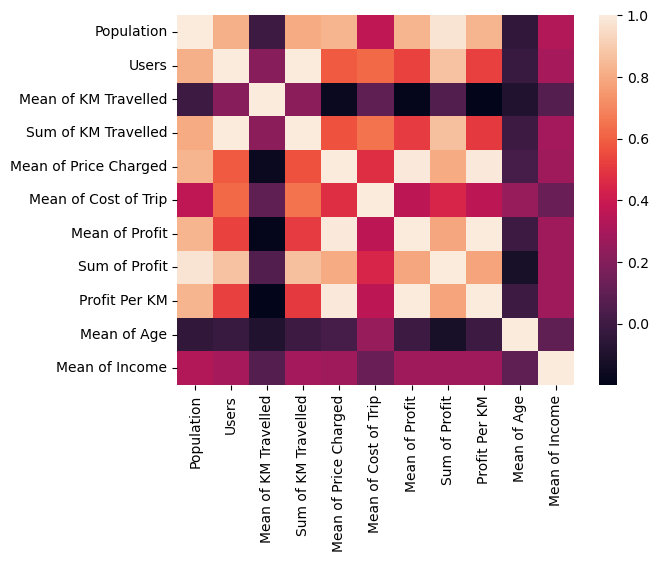

In [66]:
sns.heatmap(city_df.drop(["City"], axis = 1).corr());

This heatmap gives us more relationships. Such as there is high correlation between "Users" and "Sum of KM Travelled". And "Population" has high correlation with "Sum of Profit". So, there is more profits in the area which has larger population and more users.

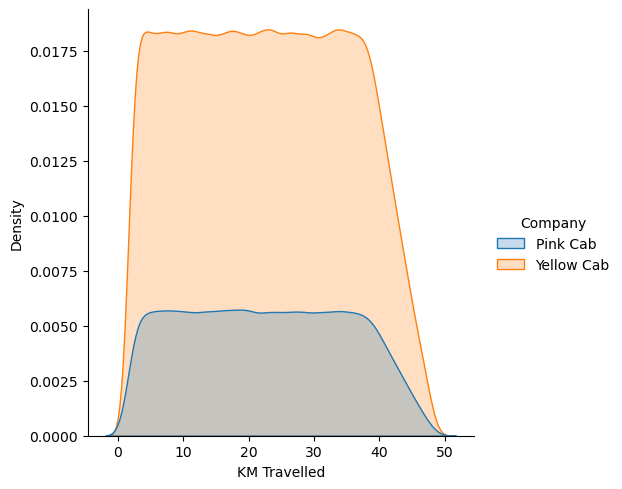

In [68]:
sns.displot(df, x="KM Travelled", hue="Company", kind="kde", fill=True)

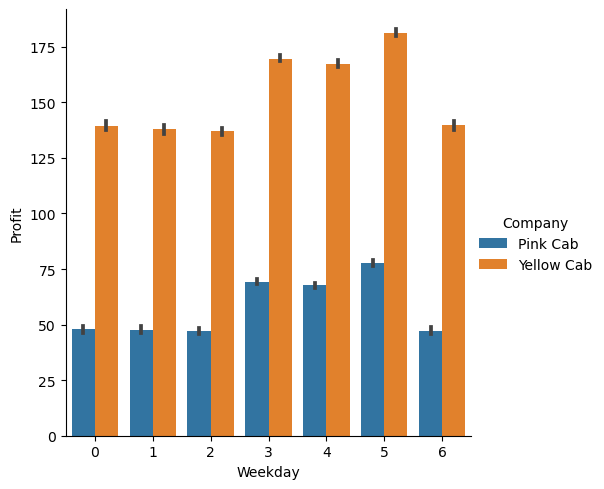

In [84]:
df["Weekday"] = df["Date of Travel"].apply(lambda x: x.weekday())
sns.catplot(data = df, kind="bar", x="Weekday", y="Profit", hue="Company")

# 4. Hypothesis and Investigate

## Hypothesis 1: Is there any difference in "KM Travelled" regarding "Company"
H0: There is no difference in travel distance.

H1: There is difference in travel distance.

In [77]:
km_travelled_Pink_Cab = df[df["Company"] == "Pink Cab"]["KM Travelled"]
km_travelled_Yellow_Cab = df[df["Company"] == "Yellow Cab"]["KM Travelled"]
stats.ttest_ind(km_travelled_Pink_Cab, km_travelled_Yellow_Cab, equal_var = False)

Ttest_indResult(statistic=-0.19970297254405983, pvalue=0.8417131770120608)

$$pvalue=0.84>\alpha=0.05$$

Therefore, we cannot reject H0. There is no significant difference in "KM Travelled" between different company.

## Hypothesis 2: Is there any difference in "Price Charged" regarding "Company"
H0: There is no difference in charged price.

H1: There is difference in charged price.

In [78]:
price_charged_Pink_Cab = df[df["Company"] == "Pink Cab"]["Price Charged"]
price_charged_Yellow_Cab = df[df["Company"] == "Yellow Cab"]["Price Charged"]
stats.ttest_ind(price_charged_Pink_Cab, price_charged_Yellow_Cab, equal_var = False)

Ttest_indResult(statistic=-176.94201665608207, pvalue=0.0)

$$pvalue=0.0<\alpha=0.05$$

Therefore, we reject H0. There is significant difference in "Price Charged" between different company.

## Hypothesis 3: Is there any difference in "Cost of Trip" regarding "Company"
H0: There is no difference in cost of trip.

H1: There is difference in cost of trip.

In [79]:
cost_of_trip_Pink_Cab = df[df["Company"] == "Pink Cab"]["Cost of Trip"]
cost_of_trip_Yellow_Cab = df[df["Company"] == "Yellow Cab"]["Cost of Trip"]
stats.ttest_ind(cost_of_trip_Pink_Cab, cost_of_trip_Yellow_Cab, equal_var = False)

Ttest_indResult(statistic=-89.01971247300352, pvalue=0.0)

$$pvalue=0.0<\alpha=0.05$$

Therefore, we reject H0. There is significant difference in "Cost of Trip" between different company.

## Hypothesis 4: Is there any difference in "Profit" regarding "Company"
H0: There is no difference in profit.

H1: There is difference in profit.

In [80]:
profit_Pink_Cab = df[df["Company"] == "Pink Cab"]["Profit"]
profit_Yellow_Cab = df[df["Company"] == "Yellow Cab"]["Profit"]
stats.ttest_ind(profit_Pink_Cab, profit_Yellow_Cab, equal_var = False)

Ttest_indResult(statistic=-230.99551452746306, pvalue=0.0)

$$pvalue=0.0<\alpha=0.05$$

Therefore, we reject H0. There is significant difference in "Profit" between different company.